# Convergence to $\pi$

Finding numerical approximations to $\pi$ has fascinated people for millenia. One famous formula is

$ \displaystyle \frac{\pi^2}{6} = 1 + \frac{1}{2^2} + \frac{1}{3^2} + \cdots. $


Say $s_k$ is the sum of the first $k$ terms of the series above, and $p_k = \sqrt{6s_k}$. Here is a fancy way to compute these sequences in a compact code.

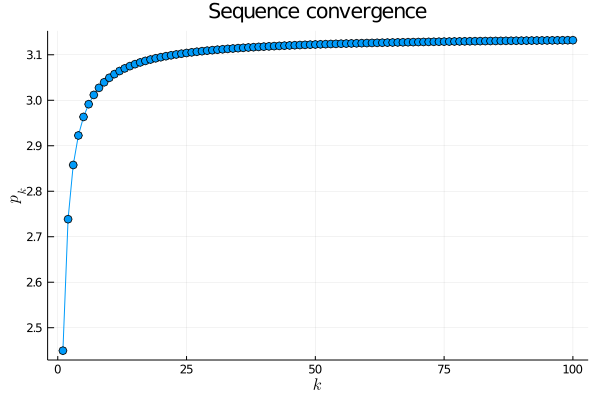

In [1]:
a = [1/k^2 for k=1:100] 
s = cumsum(a)        # cumulative summation
p = @. sqrt(6*s)

using Plots,LaTeXStrings
plot(1:100,p,m=:o,leg=:none,xlabel=L"k",ylabel=L"p_k",title="Sequence convergence")

This graph suggests that $p_k\to \pi$ but doesn't give much information about the rate of convergence. Let $\epsilon_k=|\pi-p_k|$ be the sequence of errors. By plotting the error sequence on a log-log scale, we can see a nearly linear relationship.

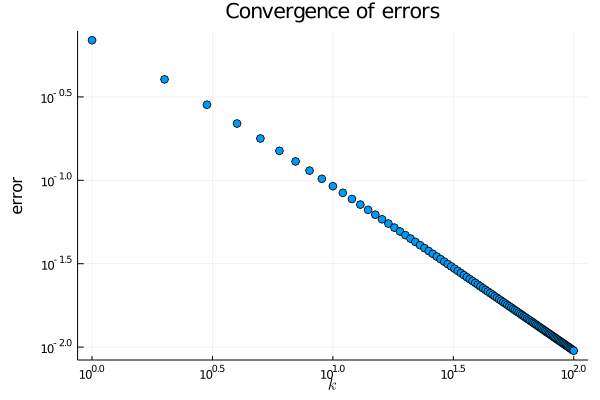

In [2]:
ep = @. abs(pi-p)    # error sequence
plot(1:100,ep,m=:o,l=nothing,
    leg=:none,xaxis=(:log10,L"k"),yaxis=(:log10,"error"),title="Convergence of errors")

This suggests a power-law relationship where $\epsilon_k\approx a k^b$, or $\log \epsilon_k \approx b (\log k) + \log a$.

In [3]:
k = 1:100
V = [ k.^0 log.(k) ]     # fitting matrix
c = V \ log.(ep)         # coefficients of linear fit

2-element Array{Float64,1}:
 -0.1823752497283019
 -0.9674103233127926

In terms of the parameters $a$ and $b$ used above, we have

In [4]:
@show (a,b) = exp(c[1]),c[2];

(a, b) = (exp(c[1]), c[2]) = (0.8332885904225771, -0.9674103233127926)


It's tempting to conjecture that $b\to -1$ asymptotically. Here is how the numerical fit compares to the original convergence curve.

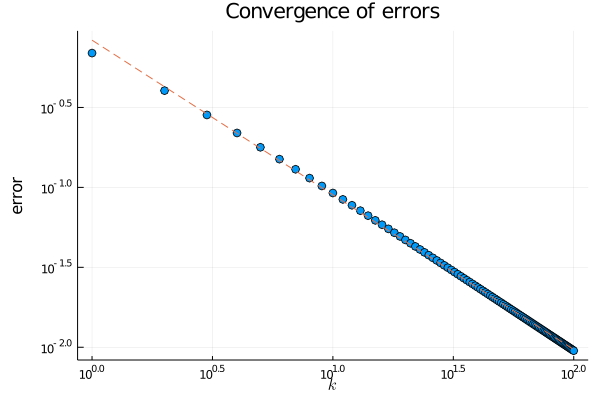

In [5]:
plot!(k,a*k.^b,l=:dash)